In [16]:
import pandas as pd  #import pandas
import numpy as np

In [4]:
df = pd.read_csv("/content/DataNeuron_Text_Similarity.csv")       #getting dataframe

In [5]:
df.head()

,text1,text2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...


In [6]:
#storing values of text1 and text2 colums in different list
data_text1 = df.iloc[:,0]
data_text2 = df.iloc[:,1]

In [7]:
data_text1

0       broadband challenges tv viewing the number of ...
1       rap boss arrested over drug find rap mogul mar...
2       player burn-out worries robinson england coach...
3       hearts of oak 3-2 cotonsport hearts of oak set...
4       sir paul rocks super bowl crowds sir paul mcca...
                              ...                        
2995    uk directors guild nominees named martin scors...
2996    u2 to play at grammy awards show irish rock ba...
2997    pountney handed ban and fine northampton coach...
2998    belle named  best scottish band  belle & sebas...
2999    criminal probe on citigroup deals traders at u...
Name: text1, Length: 3000, dtype: object

In [8]:
data_text2

0       gardener wins double in glasgow britain s jaso...
1       amnesty chief laments war failure the lack of ...
2       hanks greeted at wintry premiere hollywood sta...
3       redford s vision of sundance despite sporting ...
4       mauresmo opens with victory in la amelie maure...
                              ...                        
2995    steel firm  to cut  45 000 jobs mittal steel  ...
2996    israel looks to us for bank chief israel has a...
2997    india and iran in gas export deal india has si...
2998    mido makes third apology ahmed  mido  hossam h...
2999    former ni minister scott dies former northern ...
Name: text2, Length: 3000, dtype: object

In [9]:
len(df)

3000

In [10]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 5.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [11]:
# using the model - 'all-mpnet-base-v2'
from sentence_transformers import SentenceTransformer,util
model = SentenceTransformer('BAAI/bge-small-en-v1.5')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [12]:
#calculating cosine-similarity of each pair of the given dataset
cos_sim_list = []
for row in df.itertuples():

    emb1 = model.encode(row.text1)
    emb2 = model.encode(row.text2)
    temp1 = util.cos_sim(emb1,emb2)[0][0]
    cos_sim_list.append(temp1)


In [13]:
cos_sim_list

[tensor(0.5086),
 tensor(0.4378),
 tensor(0.4873),
 tensor(0.3564),
 tensor(0.4627),
 tensor(0.4563),
 tensor(0.4521),
 tensor(0.4242),
 tensor(0.4180),
 tensor(0.4378),
 tensor(0.5366),
 tensor(0.4960),
 tensor(0.5542),
 tensor(0.5301),
 tensor(0.4652),
 tensor(0.3598),
 tensor(0.5369),
 tensor(0.6554),
 tensor(0.5012),
 tensor(0.4659),
 tensor(0.3900),
 tensor(0.4491),
 tensor(0.3858),
 tensor(0.3576),
 tensor(0.5500),
 tensor(0.4683),
 tensor(0.4524),
 tensor(0.4666),
 tensor(0.4241),
 tensor(0.4586),
 tensor(0.4917),
 tensor(0.4810),
 tensor(0.5438),
 tensor(0.4581),
 tensor(0.4838),
 tensor(0.5211),
 tensor(0.4918),
 tensor(0.5607),
 tensor(0.4506),
 tensor(0.4561),
 tensor(0.5175),
 tensor(0.4442),
 tensor(0.4114),
 tensor(0.3807),
 tensor(0.4280),
 tensor(0.4128),
 tensor(0.5657),
 tensor(0.4602),
 tensor(0.4441),
 tensor(0.5285),
 tensor(0.5100),
 tensor(0.4995),
 tensor(0.4385),
 tensor(0.5855),
 tensor(0.4982),
 tensor(0.5867),
 tensor(0.6069),
 tensor(0.5044),
 tensor(0.4137

In [14]:
print(len(cos_sim_list))

3000


# **5 Number Summary**

In [17]:
min, q1, median , q3, max = np.percentile( sorted(cos_sim_list),[0,25,50 ,75,100])

In [18]:
print(f"max -> {max} \nmin -> {min} \nmedian -> {median} \n75 percentile -> {q3} \n25 percentile -> {q1}")

max -> 1.0000001192092896 
min -> 0.3089115619659424 
median -> 0.47273652255535126 
75 percentile -> 0.5167642384767532 
25 percentile -> 0.4355839714407921


# **Visualizing the data**

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-20-5162714398a6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cos_sim_list)


<Axes: ylabel='Density'>

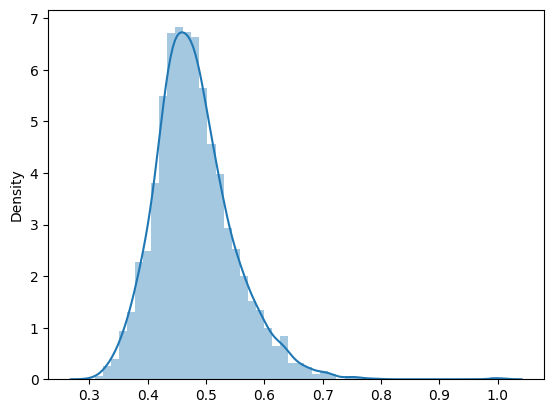

In [20]:
sns.distplot(cos_sim_list)

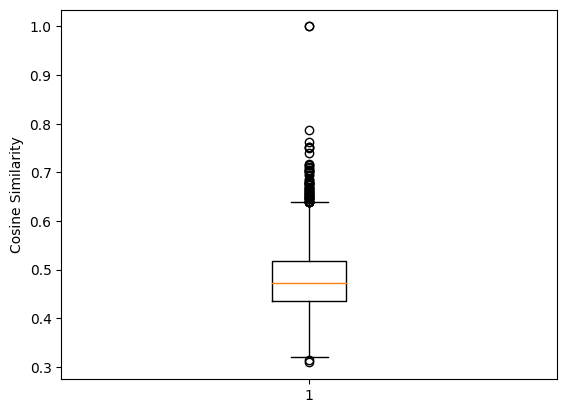

In [21]:
plt.boxplot(cos_sim_list)
plt.ylabel("Cosine Similarity")
plt.show()

# Removing **Outliers**

In [22]:
# def modify_value(cos_sim_list):
IQR = q3-q1
lower_fence = q1 - 1.5 * IQR
upper_fence = q3 + 1.5 * IQR
print(upper_fence)
print(lower_fence)


0.638534639030695
0.31381357088685036


In [23]:
for i in range(len(cos_sim_list)):
  if cos_sim_list[i] < lower_fence:
    cos_sim_list[i]=lower_fence
  elif cos_sim_list[i] > upper_fence:
    cos_sim_list[i]=upper_fence

<ipython-input-24-5162714398a6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cos_sim_list)


<Axes: ylabel='Density'>

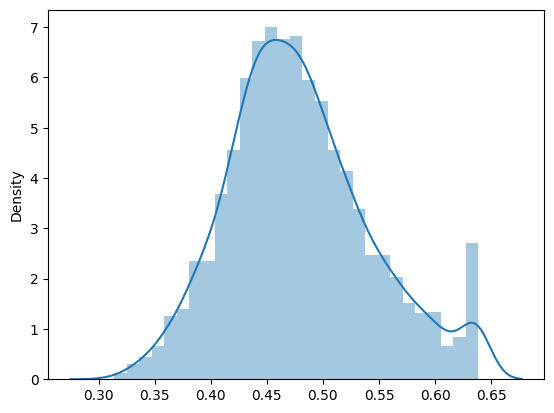

In [24]:
sns.distplot(cos_sim_list)

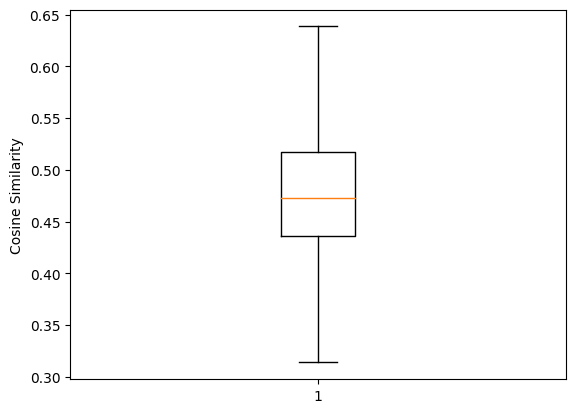

In [25]:
plt.boxplot(cos_sim_list)
plt.ylabel("Cosine Similarity")
plt.show()

# Making values in range 0 to 1 based on lower fence and upper fence values

In [26]:
def min_max_normalize(cos_sim_list, min_val, max_val):
    normalized_data = [(cos_sim_list[x] - lower_fence) / (upper_fence - lower_fence) for x in range(len(cos_sim_list))]
    return normalized_data

In [27]:
cos_sim_list = min_max_normalize(cos_sim_list, min, max)

<ipython-input-28-5162714398a6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cos_sim_list)


<Axes: ylabel='Density'>

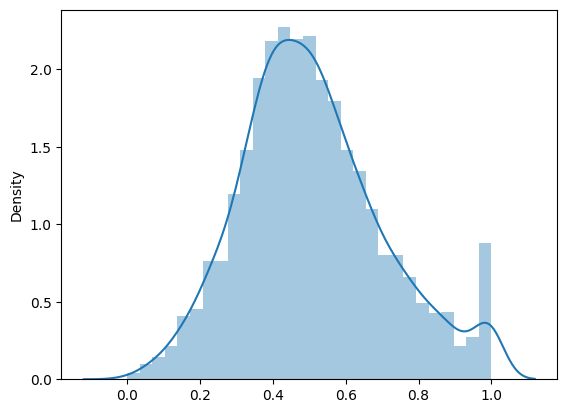

In [28]:
sns.distplot(cos_sim_list)

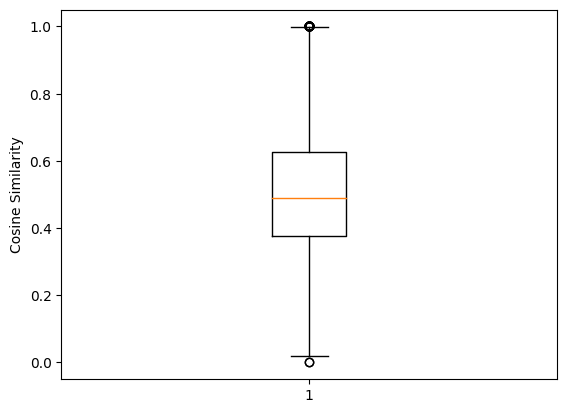

In [31]:
plt.boxplot(cos_sim_list)
plt.ylabel("Cosine Similarity")
plt.show()

# **Checking the final output**

In [32]:
# function to generate cosine similarity

def get_sim(embedding_1, embedding_2):
  output = util.cos_sim(embedding_1, embedding_2)
  return output

In [33]:
# getting encoding of the text and making cosine similarity in range of

emb1 = model.encode(df.iloc[0,0])
emb2 = model.encode(df.iloc[0,1])

similarity = get_sim(emb1, emb2)

similarity = (similarity - lower_fence) / (upper_fence - lower_fence)

similarity[0][0]


tensor(0.5998)

# **Pickle model and function object**

In [34]:
# For model object
import pickle
with open("model_1.pkl", "wb") as f:
  pickle.dump(model,f)

In [35]:
# For function object
with open("get_sim_1.pkl", "wb") as f:
  pickle.dump(get_sim, f)